### EDA (Exploratory Data Analysis)

데이터를 이해하고 패턴을 찾아 문제점을 식별하고 가설을 검정하는 과정

1. 데이터 로딩 및 형태 확인 , 변수명 Simplification

2. 변수 선택, 변수 (변수 속성) 확인, 변환

3. 데이터 재구조화

4. 변수별 요약 통계량 확인

   * 이상치, 결측치

   * 연속형 변수의 분포 치우침, 범주형 변수의 class 불균형

5. 변수간 관계 통계량 확인

   a. 반응변수 vs 설명변수 (범주, 연속) 상관관계
 
   b. 설명변수 vs 설명변수 상관관계

#### 1. 데이터 로딩, 형태 확인, 변수명 간략화

* python 3.7 compatible 'janitor version'
 
  ```bash
  pip install pyjanitor=0.21.0
  ```

* .clean_names() 주요 인자

  * case_type  (default 'lower') : 열 이름 대/소문자 처리 방식 (lower, upper, carmel, title 등)

  * remove_special  (default True) : 특수 문자 제거 여부

  * strip_underscore  (default True) : 언더스코어 제거 여부

In [2]:
# import warnings
# warnings.filterwarnings('ignore', category=Warning)

import pandas as pd
import janitor

df = pd.read_csv('../data/ex_data/adp1.csv')

# column 직접 변경 (columns 를 str 를 통해 접근 가능!)
df.columns = df.columns.str.upper()
display(df.head(2))

# janitor
df = df.clean_names(
    case_type='lower' , 
    remove_special= True, 
    strip_underscores=True
) # 해당값이 default
display(df.head(2))


,SCHOOL,SEX,PAID,FAMREL,FREETIME,GOOUT,DALC,WALC,HEALTH,ABSENCES,GRADE
0,GP,F,no,4,3,4.0,1,1,3,6,1
1,GP,F,no,5,3,3.0,1,1,3,4,1


,school,sex,paid,famrel,freetime,goout,dalc,walc,health,absences,grade
0,GP,F,no,4,3,4.0,1,1,3,6,1
1,GP,F,no,5,3,3.0,1,1,3,4,1


#### 2. 변수 선택, 변수 (변수 속성) 확인, 변환

**pandas 가 가질 수 있는 데이터 타입**


* int64: 정수형 데이터

* float64: 부동소수점 데이터

* bool: 불리언(True/False) 데이터

* datetime64: 날짜와 시간 데이터

* timedelta[ns]: 두 datetime64 간의 차이

* category: 범주형 데이터를 나타냄. 문자열과 비슷하지만, 특정한 범주 내에서만 값을 가질 수 있음

* object: 일반적으로 문자열 데이터. 그러나 pandas에서는 열이 다른 데이터 타입을 가질 수 없는 경우에도 object 타입을 사용

각 열의 데이터 타입은 `df.dtypes`를 통해 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    366 non-null    object 
 1   sex       366 non-null    object 
 2   paid      366 non-null    object 
 3   famrel    366 non-null    int64  
 4   freetime  366 non-null    int64  
 5   goout     356 non-null    float64
 6   dalc      366 non-null    int64  
 7   walc      366 non-null    int64  
 8   health    366 non-null    int64  
 9   absences  366 non-null    int64  
 10  grade     366 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 31.6+ KB


**타입에 따른 변수 선택**

* select_dtypes('int64') 

  * int 로 주어도 동작하고 int32, int64 를 모두 True 로 처리

  * number 로 주어도 int, float 형태 모두를 가지고 올 수 있음

* df.dtypes == 'int64' 통한 boolean indexing

  * int 로 주어도 동작하고 int32, int64 를 모두 True 로 처리

  * number 로 줄 수 없음

* df.applymap(lambda x: isinstance(x, int)).all()

  * applymap 을 통해 각 열의 각 element 하나씩에 대해

  * isinstance 를 통해 타입을 비교하고

  * all 을 통해 모두 int 타입인 경우 True

  * 이를 통해 boolean indexing

  * 파이선의 내장 타입인 int, float, bool, str, tuple, dict, set 을 체크

  * int64, int32 등 pandas 의 타입은 체크하지 못함

In [4]:
df = pd.read_csv('../data/ex_data/adp1.csv')

# int 형 컬럼을 선택하여 int32 로 변환

df_int1 = df.select_dtypes('int').astype('int32')

df_int2 = df.loc[:, df.dtypes == 'int'].astype('int32')

df_int3 = df.loc[:, df.applymap(lambda x : isinstance(x, int)).all()].astype('int32')

# number :  use np.number or 'number'
# object (string ): use the object dtype, ( note :  this will return *all* object )
# 
# See the numpy dtype hierarchy <https://numpy.org/doc/stable/reference/arrays.scalars.html>__
# To select datetimes, use np.datetime64, 'datetime' or 'datetime64'
# To select timedeltas, use np.timedelta64, 'timedelta' or 'timedelta64'
# To select Pandas categorical dtypes, use 'category'
# To select Pandas datetimetz dtypes, use 'datetimetz' (new in 0.20.0) or 'datetime64[ns, tz]'

df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   famrel    366 non-null    int64  
 1   freetime  366 non-null    int64  
 2   goout     356 non-null    float64
 3   Dalc      366 non-null    int64  
 4   Walc      366 non-null    int64  
 5   health    366 non-null    int64  
 6   absences  366 non-null    int64  
 7   grade     366 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 23.0 KB


※ Remark

* list 를 dataframe 에 넣고 이를 type 으로 식별할 수 있나?

In [5]:
df = pd.read_csv('../data/ex_data/adp1.csv')

# list 객체를 B 열에 추가
df['B'] = [[] for _ in range(len(df))]

# object 를 통한 filtering 
df.select_dtypes('object').info()

# list 를 통한 filtering
df.select_dtypes(list).info()   # list 는 인지하지 못함!!!!

# 모든 element 검사를 통한 filtering
df.applymap(lambda x: isinstance(x, list)).all()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  366 non-null    object
 1   sex     366 non-null    object
 2   paid    366 non-null    object
 3   B       366 non-null    object
dtypes: object(4)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  366 non-null    object
 1   sex     366 non-null    object
 2   paid    366 non-null    object
 3   B       366 non-null    object
dtypes: object(4)
memory usage: 11.6+ KB


school      False
sex         False
paid        False
famrel      False
freetime    False
goout       False
Dalc        False
Walc        False
health      False
absences    False
grade       False
B            True
dtype: bool

**변수 하나씩에 대한 처리**

* assign (변수1 = 처리함수1, 변수2=처리함수2) 와 같은 형태로 하나씩 대응

In [6]:
# 변수 하나 하나에 대해서 변환하는 방법 (신규 생성시에도 가능)

df.assign(
   # 표준화 , Standardization
   famrel = lambda x: (x.famrel - x.famrel.mean()) / x.famrel.std(),
   # 정규화 , Normalization
   freetime = lambda x : (x.freetime - x.freetime.min()) / (x.freetime.max() - x.freetime.min()) 
).head(2)

,school,sex,paid,famrel,freetime,goout,Dalc,Walc,health,absences,grade,B
0,GP,F,no,0.064172,0.5,4.0,1,1,3,6,1,[]
1,GP,F,no,1.182599,0.5,3.0,1,1,3,4,1,[]


**Column 명의 Pattern 에 따른 Filtering**

In [7]:
# column 의 str 속성을 활용해 문자열 패턴 정의

df.loc[:, df.columns.str.startswith('f')].apply(
    lambda x : (x - x.mean()) / x.std()
).head(2)

,famrel,freetime
0,0.064172,-0.209607
1,1.182599,-0.209607


※ Remark

* apply() 함수에 대한 고찰

  * apply 는 axis 에 따라 DataFrame 의 각 열 (또는 열) 에 함수를 적용 

    * axis = 0 : 각 열에 대해 apply 로 전달되는 연산이 적용

    * axis = 1 : 각 행에 대해 apply 로 전달되는 연산에 적용

* My Error Prone Approach 

  * apply 에게 주어지는 것이 무엇이고 각 열은 어떻게 접근하는지를 먼저 생각하는 것이 Error Prone

  * ▷ axis 를 무엇으로 해서 각 열에 또는 각 행에 연산을 적용할지를 생각해야 하는 것!

#### 3. 데이터 재구조화


* adp1.csv 데이터 description

  * school : GP , MS

  * sex : F, M

  * paid : 추가 유료 수업 수강 여부

  * 5점 척도 스케일 변수

    * Dalc : 주중 알콜 소비량

    * Walc : 주말 알콜 소비량

    * famrel : 가족 관계

    * freetime : 자유시간

    * goout : 외출 빈도

    * health : 건강 상태

  * absence : 결섯 횟수

  * G3 : 성적 등급 (1~11 척도)

두 변수의 교차점에 대한 데이터 재구조화

* 두 변수의 교차 지점에서 교집합의 빈도 , 빈도의 정규화 (확률)

  * 예) 석사(MS) 이면서 여성(F) 인 데이터 빈도 등

* 두 변수의 교차 지점에서 다른 변수의 집계

  * 예) 여성(F) 인 석사(M) 의 결석 회수

  * 예) 여성(F) 인 석사(M) 의 결석 회수와 성적 등급

* crosstab 함수

  * 두 변수의 교차 영역에서 데이터 빈도

  * 두 변수의 교차 영역에 해당하는 데이터, 이 데이터의 다른 변수의 집계값 <--- pivot 과 유사하나 제한적

In [8]:
import numpy as np

df = pd.read_csv('../data/ex_data/adp1.csv')

# 졸업 학교 수준을 기준으로 성별에 따른 데이터 빈도
display(
    pd.crosstab(
        index = df.school,
        columns = df.sex,
    )
)

# 졸업 학교 수준을 기준으로 성별에 따른 데이터 빈도를 정규화
display(
    pd.crosstab(
        index = df.school,
        columns = df.sex,
        normalize=True
    )
)

# 졸업 학교 수준을 기준으로 성별에 평균 결석일수 
display(
    pd.crosstab(
        index = df.school,
        columns = df.sex,
        values= df.absences,
        aggfunc= np.mean
    )
)


sex,F,M
school,,
GP,172,153
MS,23,18


sex,F,M
school,,
GP,0.469945,0.418033
MS,0.062842,0.049180


sex,F,M
school,,
GP,6.604651,5.045752
MS,2.782609,4.055556


  * pivot_table 함수

In [9]:
import numpy as np


display(
    pd.pivot_table(
        data = df, 
        index = 'school',
        columns = 'sex', 
        values = ['absences', 'grade'],
        aggfunc = np.mean
    ).round(decimals=3)
)

display(
    pd.pivot_table(
        data = df, 
        index = 'school',
        columns = 'sex', 
        values = ['absences', 'grade'],
        aggfunc = {'absences':np.mean, 'grade':np.max}
    ).round(decimals=3)
)

absences         grade       
sex           F      M      F      M
school                              
GP        6.605  5.046  4.698  5.444
MS        2.783  4.056  4.565  4.667

absences        grade    
sex           F      M     F   M
school                          
GP        6.605  5.046    11  11
MS        2.783  4.056    10  10

※ 비고 : crosstab 에서는 아래와 같은 형태는 지원하지 않음

 * crosstab 의 values 는 단일 열의 값목록(sereis 등) 의미하는 것이고 여러 열의 list 를 의미하는 것이 아님 

    ```python
        # Error
        pd.crosstab(
            index = df.school, 
            columns= df.sex, 
            values=[df.absences, df.grade], 
            aggfunc = np.mean
        ).round(decimals=3)
    ```

※ 비고 : 더 일반화된 형태로 groupby ~ apply 통해 pivot_table 작성가능함

In [10]:
df.groupby(['school', 'sex'])[['absences', 'grade']].apply(np.mean).unstack()

absences               grade          
sex            F         M         F         M
school                                        
GP      6.604651  5.045752  4.697674  5.444444
MS      2.782609  4.055556  4.565217  4.666667

long-form 과 wide-form

* 데이터 시각화, 검정에서 long-form 을 요구하는 경우가 있음

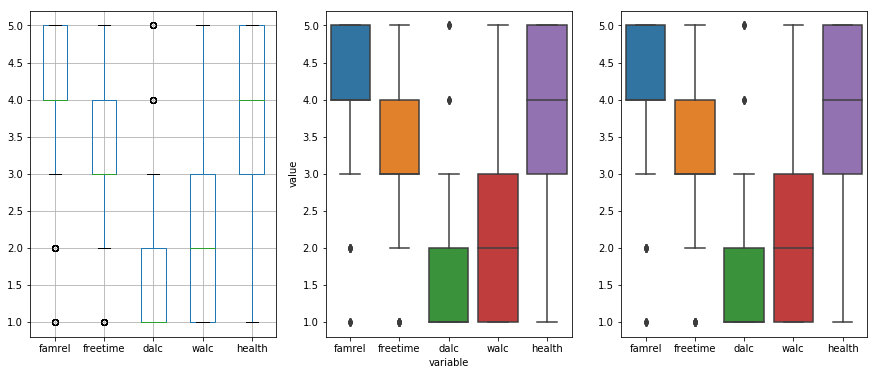

In [11]:
import janitor
import seaborn as sns
import matplotlib.pyplot as plt 

# 5점 척도 변수들의 분포를 boxplot 을 가지고 싶다고 하면?
# - dataframe 의 box plot 을 사용해도 되지만
# - searbon 의 box plot 을 쓴다고 하면 (사실 long-form, wide-form 모두 지원함)

df = pd.read_csv('../data/ex_data/adp1.csv')
df = df.clean_names().reset_index()

# 5점 척도 변수들
cols = ['famrel', 'freetime', 'dalc', 'walc', 'health']

ldf = pd.melt(
    frame = df,
    # id_vars = 'index',
    value_vars= cols,
    ignore_index=False
)

# 다양한 형태의 box plot 그리기
fig, ax = plt.subplots(1, 3, figsize=(15,6))
plt1 = df[cols].boxplot(ax=ax[0])
plt2 = sns.boxplot(x='variable', y='value', data=ldf, ax=ax[1])
plt3 = sns.boxplot(data=df[cols], ax=ax[2])
plt.show()

#### 4. 변수별 요약 통계량 확인 및 시각화

* 각 변수의 통계량은 describe 를 통해 간략히 볼 수 있음

  * 범주형 변수도 포함하여 통계량을 보려면 describe(include='all')

    * unique : 각 변수의 categories

    * top : 제일 빈도가 많은 category

    * freq : top 인 범주의 빈도

* [결론] school 이 GP 인 데이터에 편중되어 있고 goout 변수는 결측이 존재하고 asbsence 변수의 최대값은 75 로 median 에 비해 상대적으로 큼

In [12]:
df = pd.read_csv('../data/ex_data/adp1.csv')
df.describe(include='all') 

,school,sex,paid,famrel,freetime,goout,Dalc,Walc,health,absences,grade
count,366,366,366,366.000000,366.000000,356.000000,366.000000,366.000000,366.000000,366.000000,366.000000
unique,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,325,195,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.942623,3.207650,3.098315,1.469945,2.278689,3.576503,5.587432,5.000000
std,NaN,NaN,NaN,0.894113,0.990667,1.105121,0.877683,1.275237,1.382234,8.113696,3.053855
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,3.000000
50%,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,5.000000
75%,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,7.000000


* 범주형 변수의 분포를 살펴보면

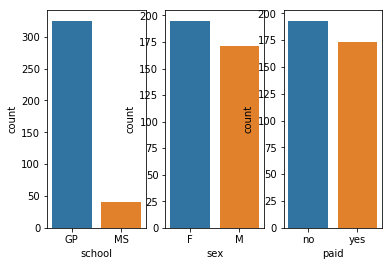

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)
for idx , col in enumerate(df.select_dtypes('object').columns):
    sns.countplot(df[col], ax=ax[idx])
plt.show()


* 수치형 변수의 분포를 살펴보면 

  * 오른꼬리가 긴 분포를 갖는 변수는 absence, Dalc, grade

  * 왼꼬리가 긴 분포를 갖는 변수는 famrel, health 

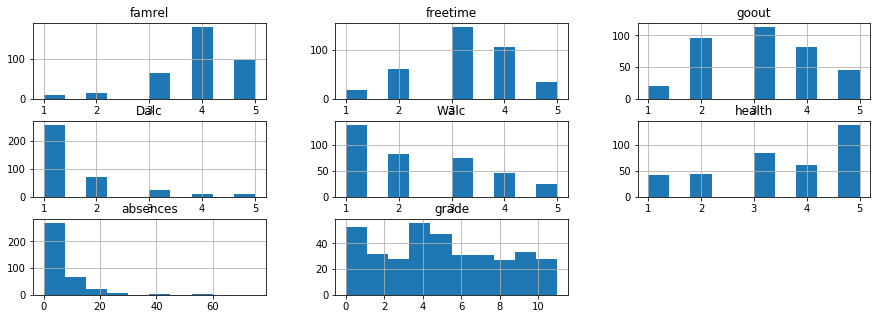

In [14]:
df.select_dtypes(include='number').hist(figsize=(15,5))
plt.show()

* q1 - 1.5 * iqr ~ q3 + 1.5 * iqr 을 이상치로 간주하는 경우 각 수치형 변수별 이상치는 아래와 같음

famrel      23
freetime    18
goout        0
Dalc        16
Walc         0
health       0
absences    14
grade        0
dtype: int64

/home/chsun/anaconda3/envs/adp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


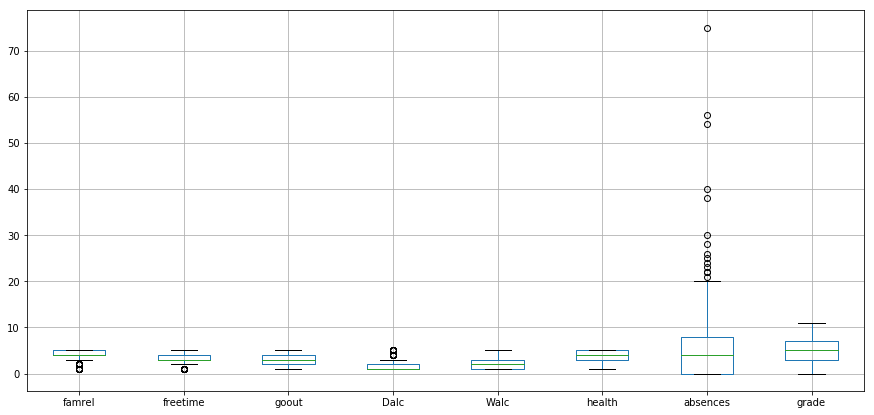

In [15]:
ndf = df.select_dtypes('number')

q1 = ndf.quantile(0.25)
q3 = ndf.quantile(0.75)
iqr = q3 - q1
outliers = (ndf < q1 - 1.5 * iqr) | (ndf > q3 + 1.5 * iqr)

display(outliers.sum())

ndf.boxplot(figsize=(15, 7))

plt.show()

* gout 변수에서 결측치는 아래와 같이 존재하고

In [16]:
df.isna().sum()[df.isna().sum().map(lambda x : x > 0)]

goout    10
dtype: int64

#### 5. 변수간 관계 통계량 확인 및 시각화

   a. 반응변수 vs 설명변수 상관관계

   (설명 변수가 연속형)
       
   `grade 와 상관관계가 높은 변수는 없었음`
         
   (설명 변수가 범주형)

   `gender 에 따른 grade 의 차이가 유의미함`

   b. 설명변수 vs 설명변수 상관관계

   `Dalc, Walc 간예 peason coefficient 가 0.65 로 다소 높은 편` 

※ 비고. 연속형 설명 변수와 반응 변수간 상관관계를 분석할 때

  * scipy.stats.pearsonr 을 사용하는 경우 결측치가 모두 제거된 상태에서 pearsonr 호출해야 함

,goout,Dalc,Walc,health,absences
0,-0.100964,-0.060484,-0.042766,-0.047105,-0.033015
1,0.057020,0.255022,0.421142,0.375537,0.534668


,famrel,freetime,goout,Dalc,Walc,health,absences,grade
famrel,1.000000,0.155768,0.071379,-0.098212,-0.130108,0.093343,-0.041415,0.035118
freetime,0.155768,1.000000,0.279980,0.218311,0.160089,0.084404,-0.073843,0.033507
goout,0.071379,0.279980,1.000000,0.265128,0.409062,0.011444,0.030994,-0.100964
Dalc,-0.098212,0.218311,0.265128,1.000000,0.651279,0.078684,0.087318,-0.059286
Walc,-0.130108,0.160089,0.409062,0.651279,1.000000,0.078021,0.115204,-0.042914
health,0.093343,0.084404,0.011444,0.078684,0.078021,1.000000,-0.020508,-0.033751
absences,-0.041415,-0.073843,0.030994,0.087318,0.115204,-0.020508,1.000000,-0.026095
grade,0.035118,0.033507,-0.100964,-0.059286,-0.042914,-0.033751,-0.026095,1.000000


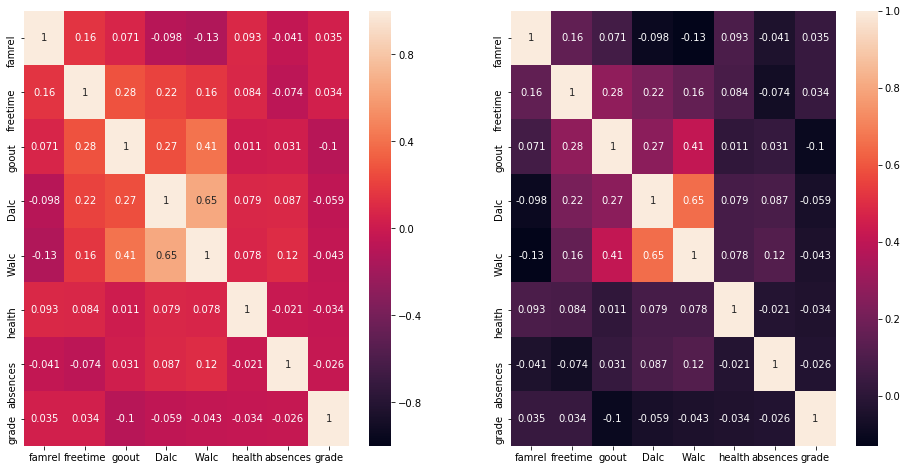

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

sns.heatmap(df.corr(method='pearson'), vmin = -1.0 , vmax=1.0, ax = ax[0] ,annot=True)
sns.heatmap(df.corr(method='pearson'), ax=ax[1], annot=True)
display(df.corr(method='pearson'))
plt.show()

# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(16,8)
# sns.heatmap(df.corr(method='spearman'), vmin = -1.0 , vmax=1.0, ax = ax[0] ,annot=True)
# sns.heatmap(df.corr(method='spearman'), ax=ax[1], annot=True)
# display(df.corr(method='spearman'))
# plt.show()

Categoric var "school" with "grade"


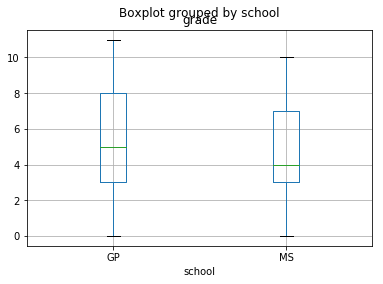

Ttest_indResult(statistic=0.9513601076807264, pvalue=0.34568947405230965)

Categoric var "sex" with "grade"


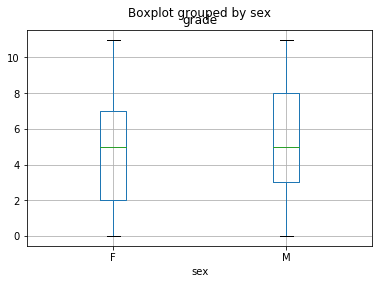

Ttest_indResult(statistic=-2.136248810696903, pvalue=0.033338733031342986)

Categoric var "paid" with "grade"


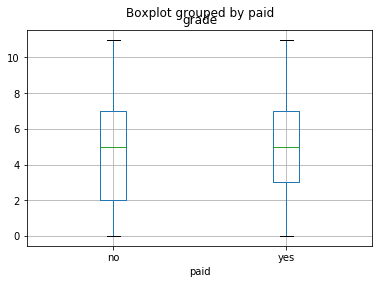

Ttest_indResult(statistic=-1.3489989318329123, pvalue=0.17817681848477884)



In [87]:
from scipy.stats import ttest_ind

x_cols_cat = ['school', 'sex', 'paid']
y_col = 'grade'

for col in x_cols_cat:
    print(f'Categoric var "{col}" with "{y_col}"')
    df.boxplot(column='grade', by=col)
    plt.show()
    cats = df[col].unique().tolist()
    if(len(cats) == 2):
        con = df.loc[df[col] == cats[0], 'grade']
        tr = df.loc[df[col] == cats[1], 'grade']
        print(ttest_ind(con, tr, equal_var=False))
    print()



In [ ]:
from scipy.stats import pearsonr

df = pd.read_csv('../data/ex_data/adp1.csv')

x_cols_cat = ['school', 'sex', 'paid']
x_cols_num = ['goout', 'Dalc', 'Walc','health', 'absences']
y_col = 'grade'

df.dropna()[x_cols_num].apply(lambda x : pearsonr(x, df.dropna()[y_col]))
